# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
marswx_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = marswx_soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Help with ChatGPT
# Extract the table headers
headers = [th.text for th in table.find_all('th')]
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [10]:
# help with ChatGPT
# Extract the table rows
rows = []
for row in table.find_all('tr', class_='data-row'):
    row_data = [td.text for td in row.find_all('td')]
    rows.append(row_data)
# rows

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(rows, columns=headers)

# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [18]:
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [19]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [28]:
# 1. How many months are there on Mars?
# help with ChatGPT
month_counts = mars_df['month'].value_counts()
months_count_sorted = month_counts.sort_index()

print(months_count_sorted)

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [30]:
# 2. How many Martian days' worth of data are there?
total_days = mars_df['sol'].nunique()
total_days

1867

In [33]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month = mars_df.groupby('month')['min_temp'].agg('mean')
avg_low_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

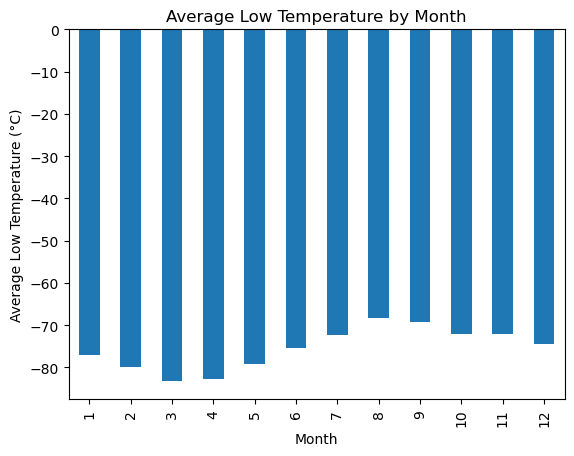

In [34]:
# Plot the average temperature by month
avg_low_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Low Temperature (°C)')
plt.title('Average Low Temperature by Month')
plt.show()

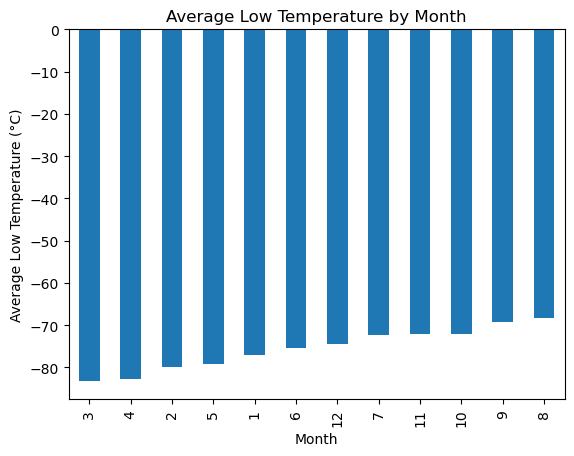

In [40]:
# Identify the coldest and hottest months in Curiosity's location
avg_low_temp_by_month_sorted = avg_low_temp_by_month.sort_values()
avg_low_temp_by_month_sorted.plot(kind='bar', xlabel='Month', ylabel='Average Low Temperature (°C)')
plt.title('Average Low Temperature by Month')
plt.show()

Month 3 is the coldes and month 8 is the warmest

In [37]:
# 4. Average pressure by Martian month
avg_daily_pressure = mars_df.groupby('month')['pressure'].agg('mean')
avg_daily_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

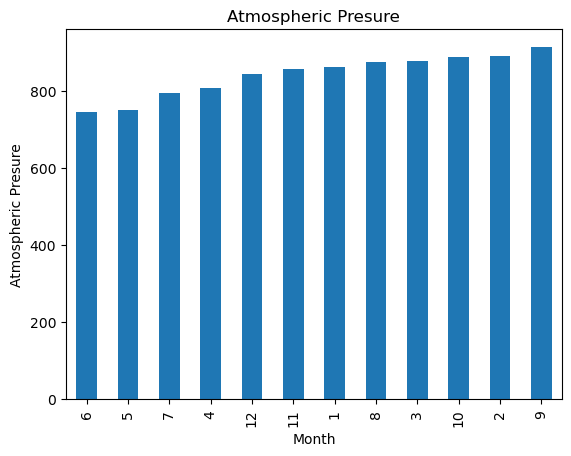

In [41]:
# Plot the average pressure by month
avg_daily_pressure_sorted = avg_daily_pressure.sort_values()
avg_daily_pressure_sorted.plot(kind='bar', xlabel='Month', ylabel='Atmospheric Presure')
plt.title('Atmospheric Presure')
plt.show()

Month 6 is the lowest pressure and months 9 is the higest pressrue on avearge 

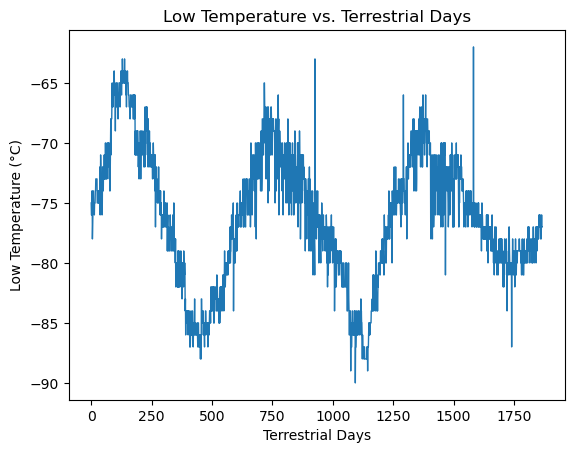

In [45]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# might be extra but with the help of chatGPT we used a new varible 
low_temp = mars_df['min_temp']

# Looks like we want a line chart - I think a scatte would work too 
plt.plot(range(len(mars_df)), low_temp, linewidth=1)
plt.xlabel('Terrestrial Days')
plt.ylabel('Low Temperature (°C)')
plt.title('Low Temperature vs. Terrestrial Days')
plt.show()

Using the tempature peeks or vallys as the full orbit of mars it look like a martian year is roughtly 650-675 days apart. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
mars_df.to_csv("output_data/cities.csv", index=False)

In [21]:
browser.quit()